In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def class_generator(npoints, mu = [0,0], cov = [[0.1, 0],[0, 0.1]]):
    class_dict = {}
    class_dict['mu'] = mu
    class_dict['cov'] = cov
    class_dict['npoints'] = npoints
    class_dict['points'] = np.random.multivariate_normal(mean = mu, cov = cov, size = npoints)
    return class_dict


def S_calculator(w, point_classes):
    cov = []
    mean = []
    for i in range(len(point_classes)):
        cov.append(np.cov(point_classes[i]['points'].T))
        mean.append(np.mean(point_classes[i]['points'], axis =0))
    B = np.sum(np.array(cov), axis = 0)
    A = np.cov(np.array(mean).T)
    
    return np.matmul(np.matmul(np.reshape(w, [1,-1]),A),np.reshape(w, [-1,1]))/np.matmul(np.matmul(np.reshape(w, [1,-1]),B),np.reshape(w, [-1,1]))


def LDA(point_classes):
    cov = []
    mean = []
    for i in range(len(point_classes)):
        cov.append(np.cov(point_classes[i]['points'].T))
        mean.append(np.mean(point_classes[i]['points'],axis =0 ))
    B = np.sum(np.array(cov), axis = 0)
    A = np.cov(np.array(mean).T)
    w, v= np.linalg.eig(np.matmul(np.linalg.inv(B),A))
    return w, v.T
    
def plotter(class_dict, style = 'bo'):
    temp = class_dict['points']
    for i in range(class_dict['npoints']):
        plt.plot(temp[i][0],temp[i][1], style)

def projection_plotter(class_dict, proj, style = 'bo'):
    temp = class_dict['points']
    for i in range(class_dict['npoints']):
        plt.plot(np.dot(temp[i], proj[0]),np.dot(temp[i], proj[1]), style)

In [4]:
classes = []
classes.append(class_generator(50, mu = [2, 6], cov = [[0.2, 0.15],[0.15,0.2]]))
classes.append(class_generator(50, mu = [2.5, 5.5], cov = [[0.2, 0.15],[0.15,0.2]]))
classes.append(class_generator(50, mu = [3, 5], cov = [[0.2, 0.15],[0.15,0.2]]))

In [5]:
w, v = LDA(classes)
print(w)
print(v)

[ 0.00488064  3.7953994 ]
[[-0.76247696 -0.64701537]
 [ 0.71473439 -0.69939599]]


In [6]:
print(S_calculator(v[0], classes))
print(S_calculator(v[1], classes))

[[ 0.00488064]]
[[ 3.7953994]]


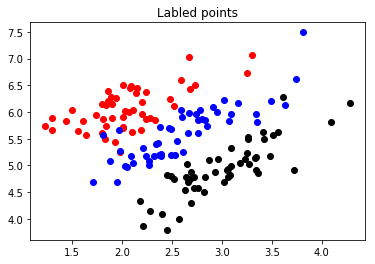

In [7]:
plotter(classes[0], 'ro')
plotter(classes[1], 'bo')
plotter(classes[2], 'ko')
plt.title("Labled points")
plt.show()

### Bigger the weight, the more separable points

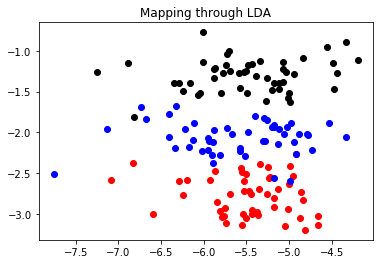

In [8]:
projection_plotter(classes[0], v, 'ro')
projection_plotter(classes[1], v, 'bo')
projection_plotter(classes[2], v, 'ko')
plt.title("Mapping through LDA")
plt.show()